In [1]:
username = "Alex"
env = "integrate"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\" * env * "\\")
include(pathtorepo * "dynamical-systems\\system.jl");

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


In [2]:
using StaticArrays, DifferentialEquations, DynamicalSystems, LinearAlgebra
using CairoMakie, GLMakie

In [3]:
function get_eigen(u, p, jac_system, t = 0.0)
    Ju = jac_system(u, p, t)
    ei_u = eigen(Ju)
    return (fp = u, ei = ei_u)
end
function show_fp_eigen(data)
    println("fixed point: $(data.fp)")
    println("---------------------------------------------------")
    println("eigenvalues: $(data.ei.values)")
    println("---------------------------------------------------")
    println("eigenvectors:")
    show(stdout, "text/plain", data.ei.vectors); println()
    println("---------------------------------------------------"); println()
end
function shift_vec(eifp, col; ϵ = 1e-6, sign_ = +)
    sign_(eifp.fp, real(eifp.ei.vectors[:, 1]) * ϵ)
end;

In [4]:
t = 500.0; tt = 600.0; tstep = 0.001
trange = range(0.0, t, step = tstep)
integ_set = (alg = RK4(), adaptive = false, dt = tstep)

E = interval(-40, 40); x = interval(0, 1); y = interval(0, 1)
box = IntervalBox(E, x, y);

In [5]:
const τ = 0.013;  const τD = 0.07993;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const ΔU0 = 0.305;

In [131]:
U0, I0 = 0.352, -1.695
p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0];

In [125]:
u0 = SA[7.485044731286254, 0.771932479798953, 0.5235934863993938]
ds = CoupledODEs(TM, u0, p, diffeq = integ_set)
tr, trange = trajectory(ds, t, Δt = tstep)

(3-dimensional StateSpaceSet{Float64} with 500001 points, 0.0:0.001:500.0)

In [126]:
fp, _, _ = fixedpoints(ds, box, jacob_TM_)
println("count of fixed points: $(length(fp))");

count of fixed points: 1


In [127]:
eifp1 = get_eigen(fp[1], p, jacob_TM_)
show_fp_eigen(eifp1);

fixed point: [8.601259406458018, 0.7321065479093984, 0.4073607534431367]
---------------------------------------------------
eigenvalues: ComplexF64[-9.745748379832474 + 0.0im, 3.5267600746586645 - 16.0935598576862im, 3.5267600746586645 + 16.0935598576862im]
---------------------------------------------------
eigenvectors:
3×3 SMatrix{3, 3, ComplexF64, 9} with indices SOneTo(3)×SOneTo(3):
 0.994581+0.0im     0.999881-0.0im            0.999881+0.0im
 -0.10276+0.0im   -0.0127622-0.0085394im    -0.0127622+0.0085394im
 0.015812+0.0im  0.000470149-0.00126409im  0.000470149+0.00126409im
---------------------------------------------------



In [128]:
shift = shift_vec(eifp1, 1; ϵ =  1e-6, sign_ = +)

dsshift = CoupledODEs(TM, shift, p, diffeq = integ_set)
trshift, trangeshift = trajectory(dsshift, t, Δt = tstep)

(3-dimensional StateSpaceSet{Float64} with 500001 points, 0.0:0.001:500.0)

In [129]:
lb_size = 35; tck_size = 30; dis = 60;

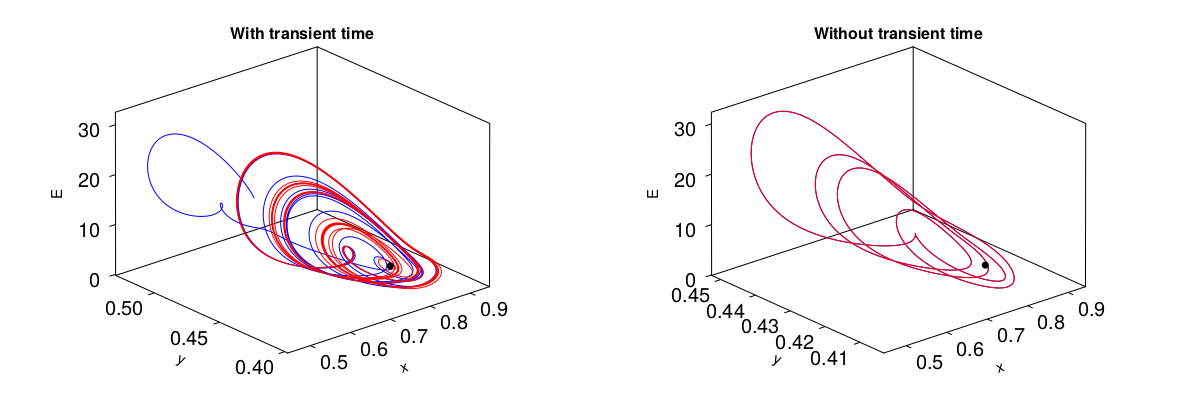

CairoMakie.Screen{IMAGE}


In [130]:
ts1, tf1 = 1, 300000
tss1, tfs1 = 1, 50000

ts2, tf2 = 400000, 500000
tss2, tfs2 = 400000, 500000

idx, idy, idz = 2, 3, 1
lb_size = 15; tck_size = 20;

CairoMakie.activate!()
f = Figure(resolution = (1200, 400), title = "?")
axis3_1 = Axis3(f[1, 1], xlabel = "x", ylabel = "y", zlabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
                xgridvisible = false, ygridvisible = false, zgridvisible = false, title = "With transient time")
axis3_2 = Axis3(f[1, 2], xlabel = "x", ylabel = "y", zlabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
                xgridvisible = false, ygridvisible = false, zgridvisible = false, title = "Without transient time")


lines!(axis3_1, tr[ts1:tf1, idx], tr[ts1:tf1, idy], tr[ts1:tf1, idz],
linewidth = 1.0, linestyle = :solid, color = :blue)
lines!(axis3_1, trshift[tss1: tfs1, idx], trshift[tss1: tfs1, idy], trshift[tss1: tfs1, idz],
linewidth = 1.0, linestyle = :solid, color = :red)

for point in fp
    scatter!(axis3_1, point[2], point[3], point[1], markersize = 10, color = :black)
end

lines!(axis3_2, tr[ts2:tf2, idx], tr[ts2:tf2, idy], tr[ts2:tf2, idz],
linewidth = 1.0, linestyle = :solid, color = :blue)
lines!(axis3_2, trshift[tss2: tfs2, idx], trshift[tss2: tfs2, idy], trshift[tss2: tfs2, idz],
linewidth = 1.0, linestyle = :solid, color = :red)

for point in fp
    scatter!(axis3_2, point[2], point[3], point[1], markersize = 10, color = :black)
end

display(f)

In [114]:
pathtosave = "C:\\Users\\Alex\\Desktop\\TM images"
filename = "\\near_fp.png"
fullpath = pathtosave * filename 
save(fullpath, f)

CairoMakie.Screen{IMAGE}


In [62]:
tss, tfs = 1, 500000
ts, tf = 1, 500000
GLMakie.activate!()
idx, idy, idz = 2, 3, 1
f = Figure(resolution = (900, 600))
ax = LScene(f[1, 1], show_axis = true)
scale!(ax.scene, 50, 50, 1)

lines!(ax, tr[ts:tf, idx], tr[ts:tf, idy], tr[ts:tf, idz],
        linewidth = 1.0, linestyle = :solid, color = :blue)

lines!(ax, trshift[tss: tfs, idx], trshift[tss: tfs, idy], trshift[tss: tfs, idz],
        linewidth = 1.0, linestyle = :solid, color = :red)

for point in fp
        scatter!(ax, point[2], point[3], point[1], markersize = 8, color = :orange)
end

display(GLMakie.Screen(), f);